In [5]:
#imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_theme()

# sklearn for scaling and clustering:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
# environment
from env import host, user, password

import warnings
warnings.filterwarnings("ignore")

### Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.

In [3]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

url = get_db_url("grocery_db")

sql = """
select *
from grocery_customers
"""

grocery_df = pd.read_sql(sql, url, index_col="customer_id")
grocery_df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
grocery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 30.9 KB


In [7]:
# Let's look for anomalies in cold storage foods.
columns = [
    'Milk',
    'Frozen',
    'Delicassen'
]

refrigerated = grocery_df[columns]

In [12]:
#scale data
scaler = MinMaxScaler()
refrigerated = pd.DataFrame(scaler.fit_transform(refrigerated), columns = refrigerated.columns)
refrigerated.head()

,Milk,Frozen,Delicassen
0,0.130727,0.003106,0.027847
1,0.132824,0.028548,0.036984
2,0.119181,0.039116,0.163559
3,0.015536,0.104842,0.037234
4,0.072914,0.063934,0.108093


In [13]:
#create DBSCAN model and fit it
db_scan = DBSCAN(eps = 0.1, min_samples = 20)
db_scan.fit(refrigerated)

DBSCAN(eps=0.1, min_samples=20)

In [14]:
#create columns for cluster labels 
grocery_df["labels"]= db_scan.labels_

In [15]:
grocery_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
customer_id,,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0


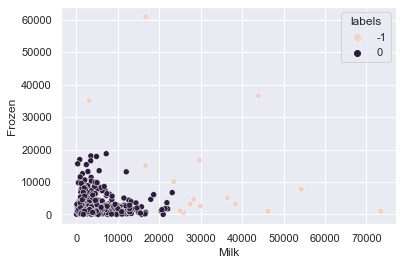

In [17]:
sns.scatterplot(x = "Milk", y = "Frozen", hue = "labels", data = grocery_df)
plt.show()

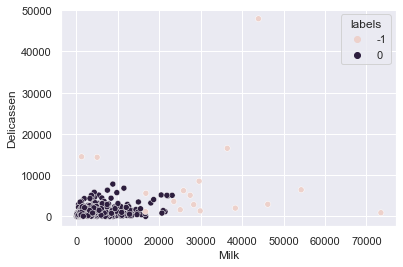

In [18]:
sns.scatterplot(x = "Milk", y = "Delicassen", hue = "labels", data = grocery_df)
plt.show()

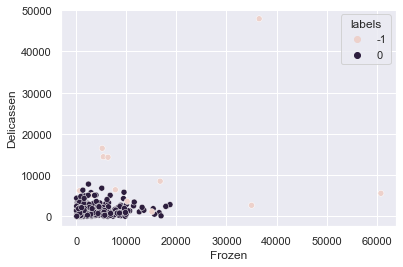

In [19]:
sns.scatterplot(x = "Frozen", y = "Delicassen", hue = "labels", data = grocery_df)
plt.show()

Text(0.5, 0, 'Delicasses')

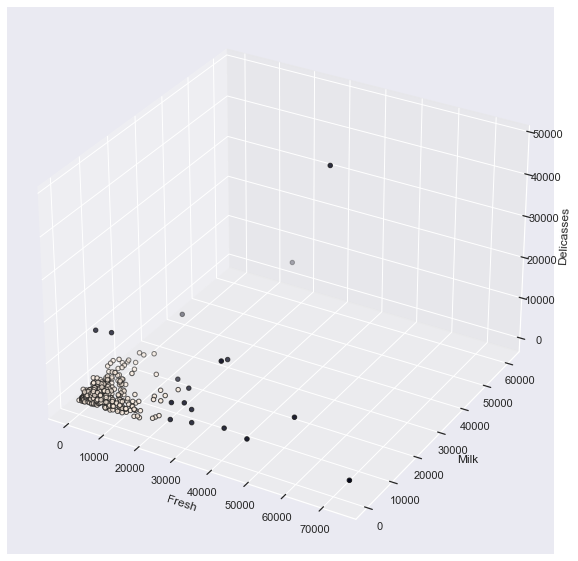

In [23]:
# Now let's plot the results

fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1])

ax.scatter(grocery_df.Milk, grocery_df.Frozen, grocery_df.Delicassen,edgecolor='k', c = grocery_df.labels)

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Delicasses')